In [ ]:
# Install dependencies
!pip install mypy sukhoi websnake untwisted ehp hug
!conda install jira docopt faker pandas-profiling moviepy gizeh
!brew install ffmpeg
!conda install -c damianavila82 rise

In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': False,
})

{'width': 1024, 'height': 768, 'scroll': False}

In [2]:
%matplotlib inline

# Life is Short




- life is short
- many of us are searching for ways to improve productivity
- as a software developer there is an obvious one

<center>![noimg](https://imgs.xkcd.com/comics/python.png)</center>

# Why Python

- extremely succint
- quick to learn
- batteries included!
- people that move to Python stay with Python more than any other language (ignoring JS)


<center>![noimg](https://blog.sourced.tech/post/language_migrations/eigenvect_stack_22lang.png)</center>

Source: https://blog.sourced.tech/post/language_migrations/

# Keeping Things Short and Sweet

`list('abc') => ['a', 'b', 'c']  # Convert iterables to arrays`

`{i: i*i for i in range(1, 5)} => {1: 1, 2: 4, 3: 9, 4: 16}  # List/dict comprehensions`

`[1, 2] * 3 => [1, 2, 1, 2, 1, 2]`

`list(zip(['a', 'b'], [1, 2])) => [('a', 1), ('b', 2)]  # Note: zip returns lazy iterable`


# Keeping Things Short and Sweet

`[(x, y) for x in ['a', 'b'] for y in [1, 2]] => [('a', 1), ('a', 2), ('b', 1), ('b', 2)]`

`[1, 2, 3, 4, 5, 6][2:-2] => [3, 4]  # Easy slicing`

`list(enumerate(['a', 'b'])) => [(0, 'a'), (1, 'b')]  # enumerate() returns lazy iterator`

`list(reversed([1, 2, 3])) => [3, 2, 1] # Again reversed() returns lazy iterator`

# Keeping Things Short and Sweet

`sorted([3,1, 2]) => [1, 2, 3]`

`sum([1, 2, 3]) => 6`

`list(filter(lambda x: x >= 0, [1, -2, 3])) => [1, 3]  # filter() returns lazy iterator`

`a, b, c = [1, 2, 3]`

`{k: (a+b) for k, (a, b) in ({'a': (1,2), 'b': (3,4)}.items())} => {'a': 3, 'b': 7}`

# The Zen of Python

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# But I like Strong Typing!

* Python can do that!
* Optional type annotations are built in to Python 3.6
* Other solutions (e.g. annotations in comments) available in earlier versions
* Checking the annotations requires using mypy package

In [2]:
%%typecheck

# %%typecheck causes this code to run with mypy

def add(x:int, y: int) -> int:
    return x + y
    
print(add(1, 2))

print(add(1.5, 2))

<string>:9: error: Argument 1 to "add" has incompatible type "float"; expected "int"

3
3.5


# But Isn't Python Slow?

- for most things that doesn't matter
- very fast libraries for things that do (like NumPy for array operations)
- performance is improving all the time
- FAT Python project will support optimizing not just the language but even library use
- there are fast implementations like PyPy and transpilers like Nuitka
- jitting is possible with projects like Numba

# Example - Mandelbrot

In [3]:
from timeit import default_timer as timer
from matplotlib.pylab import imshow, jet, show, ion
import numpy as np


def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return 255


def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

## Running without JIT

5.105895244982094


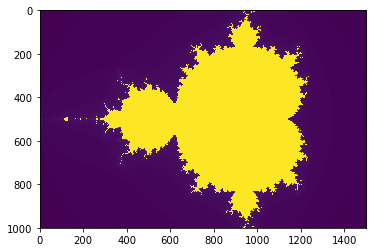

In [4]:
def time_mandel():
    image = np.zeros((500 * 2, 750 * 2), dtype=np.uint8)
    s = timer()
    create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
    e = timer()
    print(e - s)
    imshow(image)
    show()

time_mandel()

## JITing the Inner Function

0.8181997800129466


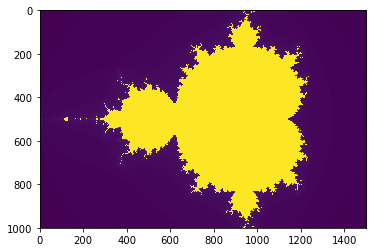

In [5]:
from numba import jit


@jit
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return 255

time_mandel()

## JITing the Outer Function

0.14452184998663142


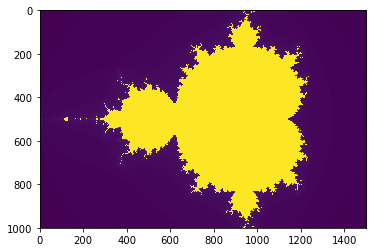

In [6]:
@jit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

time_mandel()

# Decorators


In [7]:
import time


def timelogged(fn):
    """ Outputs the time the function takes to execute. """

    def wrapper():
        t1 = time.time()
        rtn = fn()
        t2 = time.time()
        print("Time it took to run {name}: {delay}\n".format(name=fn.__name__, delay=t2 - t1))
        return rtn
    return wrapper


@timelogged
def test():
    num_list = []
    for num in (range(0, 10000)):
        num_list.append(num)
    return "\nSum of all the numbers: " + str((sum(num_list)))


print(test())

Time it took to run test: 0.0009610652923583984


Sum of all the numbers: 49995000


# Monkey patching is bad
## except when it's good



In [8]:
import getpass
import json
from jira import JIRA

def _login(self, user=None, passwd=None):
    """ Login function for eBay; JSON login is not supported by jira package out of the box. """
    if not user:
        user = getpass.getuser()
    if not passwd:
        passwd = getpass.getpass('\nPassword: ')
    url = self._options['server'] + '/rest/auth/1/session'
    self._session.post(url, data=json.dumps({'username': user, 'password': passwd}))
    # TODO: add error handling

def _issues(self, project=None, assignee='currentUser()'):
    query = 'assignee = ' + assignee
    if project:
        query += ' and project = ' + project
    return self.search_issues(query)

# Enhance the JIRA object with monkey-patched methods. We could use inheritance instead but this is easy.
JIRA.login = _login
JIRA.issues = _issues

# Command Line Arguments are Simple - Just Write the Help!

In [9]:
help = """myjira.

Usage:
  myjira.py dump [--project PROJECT] [--assignee EMAIL]
  myjira.py create --project PROJECT [--assignee EMAIL] (epic|story|task) TITLE [DESCRIPTION]
  myjira.py -h
  myjira.py -V

Options:
  -h --help            Show this screen.
  -V --version         Show version.
  -A --assignee EMAIL  Assignee to use; default is authenticated user.
  -P --project PROJECT Project to use.

"""
from docopt import docopt  # Note: from Python but now available in other languages!
# argv argument is not needed in command line Python scripts.
command = input("Args: ")
arguments = docopt(help, version="1.0", argv=command.split(' '))
print(arguments)

Args: dump -P SHIPSCM
{'--assignee': None,
 '--help': False,
 '--project': 'SHIPSCM',
 '--version': False,
 'DESCRIPTION': None,
 'TITLE': None,
 'create': False,
 'dump': True,
 'epic': False,
 'story': False,
 'task': False}


# Off to the Races with JIRA

In [10]:
j = JIRA('https://jirap.corp.ebay.com')
j.login()


Password: ········


In [11]:
argv = input("Args: ").split(' ')  # In script can use sys.argv instead

args = docopt(help, version="1.0", argv=argv)
assignee= args['--assignee'] or 'currentUser()'
project = args['--project']

if args['dump']:
    for issue in j.issues(project, assignee):
        print(issue.key, issue.fields.summary)

Args: dump -P SHIPSCM
SHIPSCM-384 Phase2b-Shipcalc Service: Migrate Shipping recommndation to new shipcalc service
SHIPSCM-195 Category based recommendation 
SHIPSCM-193 SCM Work for BOLT DE Release - Mar 2017
SHIPSCM-191 Re-calibration of Confidence Thresholds for Coverage 
SHIPSCM-177 Need to update QA machine end point for shipping recommendation
SHIPSCM-175 Respond back to Darren's escalation on incorrect weight
SHIPSCM-171 Recommendation returned while input weight and dimension for UK
SHIPSCM-165 Code health/reviews for guarantee 
SHIPSCM-149 Need to update QA machine end point for shipping recommendation
SHIPSCM-95 SCM service should support Akamai access
SHIPSCM-60 SCM: M2 - 393 - Shipping: Maintenance of Data Sets
SHIPSCM-59 SCM: M2 - 296 - COMMON: 01-RTB-Security / Legal Compliance Escalations (Emergency Handling)
SHIPSCM-58 SCM: DE - 02-RTB-Availability / Production SLA?s (Emergency Handling)
SHIPSCM-57 SCM: M2 - 485 - COMMON: 04-RTB-CS Escalations (Emergency Handling)
SHIPS

# Create Some Fake Data

In [12]:
from faker import Factory
fake = Factory.create()

data = ['|'.join([fake.name(),
                  ','.join(fake.address().split('\n')), 
                  fake.ssn(), 
                  fake.phone_number()]) for _ in range(10)]
print('\n'.join(data))

Kyle Smith|56055 Byrd Causeway,New Sheilashire, WA 53498-0418|801-76-8966|1-958-163-3054
Jeremiah Meadows|122 Robert Groves,Lake Gabrielaberg, CT 27179|290-61-2451|1-836-607-7110x674
Marcus Baker|7705 Erin Track Apt. 737,Timfurt, HI 75030-6461|846-37-5054|07873394958
Kyle Torres|616 Daniel Court Apt. 457,West Nathanshire, MS 82360|827-39-1136|137.999.7150
Veronica Garcia|01521 Alexis Loop Suite 103,East Debraview, AL 60709|402-23-1261|916-227-5254x039
Patrick Joseph|1157 Powers Plain Suite 695,New Zachary, TN 98203|509-03-4999|+91(9)2396599827
Taylor Fitzgerald|50238 Samuel Wall,Williamsbury, AS 27746-8969|476-17-4875|+56(5)7771975832
Jessica Moore|816 Williams Pike Suite 771,Lake Melissa, OR 85286-7450|496-98-0627|131-266-4971x4385
Bernard Chung|78891 Henry Pines Apt. 187,Port Jennifer, WA 40465|347-48-4557|+36(4)9891568409
Mary Jones|284 Wilson Ports Apt. 848,Bakershire, MH 43802|097-06-7949|241.572.1953


# Put it in an Excel Sheet

In [13]:
import openpyxl
wb = openpyxl.Workbook()
sheet = wb.get_active_sheet()
for i, row in enumerate(data):
    fields = row.split('|')
    for j, c in enumerate(list('ABCD')):
        sheet[c + str(i+1)] = fields[j]
wb.save('people.xlsx')
 

In [14]:
!open people.xlsx  

# Parsing Addresses

In [15]:
import usaddress

for row in data[:3]:
    print(usaddress.parse(row.split('|')[1]))

[('56055', 'AddressNumber'), ('Byrd', 'StreetName'), ('Causeway,', 'StreetNamePostType'), ('New', 'PlaceName'), ('Sheilashire,', 'PlaceName'), ('WA', 'StateName'), ('53498-0418', 'ZipCode')]
[('122', 'AddressNumber'), ('Robert', 'StreetName'), ('Groves,', 'StreetNamePostType'), ('Lake', 'PlaceName'), ('Gabrielaberg,', 'PlaceName'), ('CT', 'StateName'), ('27179', 'ZipCode')]
[('7705', 'AddressNumber'), ('Erin', 'StreetName'), ('Track', 'StreetNamePostType'), ('Apt.', 'OccupancyType'), ('737,', 'OccupancyIdentifier'), ('Timfurt,', 'PlaceName'), ('HI', 'StateName'), ('75030-6461', 'ZipCode')]


# Web Scraping with xkcd

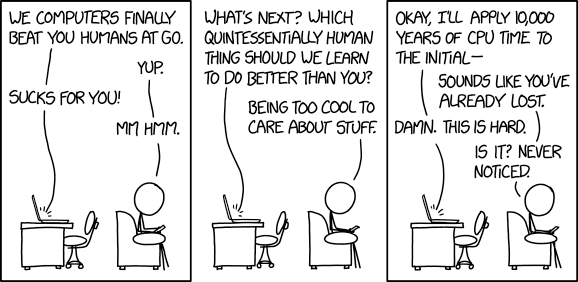

In [16]:
# Note: may need to restart kernel first
from sukhoi import MinerLXML, core
from IPython.display import Image

class ComicMiner(MinerLXML):
    def run(self, dom):
        self.append(dom.xpath("//div[@id='comic']/img")[0].get('src'))
        
URL = 'http://xkcd.com/'
comic = ComicMiner(URL)
core.gear.mainloop()

Image(URL + comic[0])

# Doing Symbolic Math

In [17]:
from sympy import *

init_printing(use_unicode=True)

x = symbols('x')
solveset(sin(x) - 1, x, domain=S.Reals)

# Quick Data Analysis with pandas and pandas_profiling

In [25]:
import pandas as pd
import pandas_profiling

# Get the mtcars dataset
data = pd.read_csv('https://gist.github.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
pandas_profiling.ProfileReport(data)

Number of variables,12
Number of observations,32
Total Missing (%),0.0%
Total size in memory,3.1 KiB
Average record size in memory,98.5 B
Numeric,10
Categorical,0
Date,0
Text (Unique),1
Rejected,1
Distinct count,2


# Plotting Data in Pandas

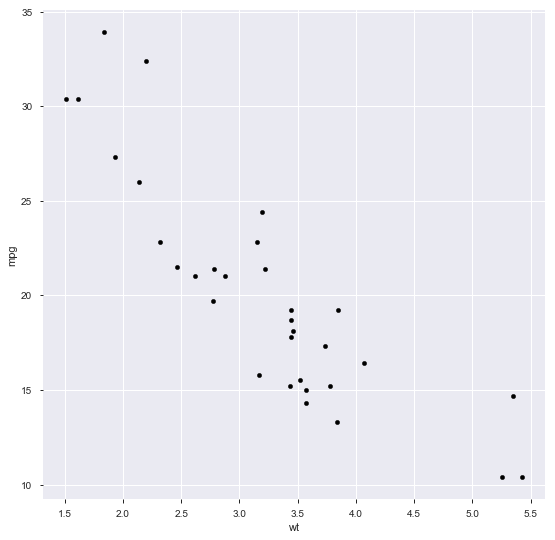

In [19]:
%matplotlib inline

data.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black")

# REST API and command line utility in one go

In [20]:
import hug


@hug.cli()
@hug.get(examples='name=Timothy&age=26')
@hug.local()
def happy_birthday(name: hug.types.text, age: hug.types.number, hug_timer=3):
    """Says happy birthday to a user"""
    return {'message': 'Happy {0} Birthday {1}!'.format(age, name),
            'took': float(hug_timer)}


if __name__ == '__main__':
    happy_birthday.interface.cli()

usage: __main__.py [-h] name age
__main__.py: error: the following arguments are required: age


SystemExit: 2

/Users/gwheeler/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [21]:
!hug -f hugtest.py -c happy_birthday Canada 150

{'message': 'Happy 150 Birthday Canada!', 'took': 0.0}


In [ ]:
!hug -f hugtest.py 

# Video Processing

<video controls src="./limehouse_nights.mp4" />

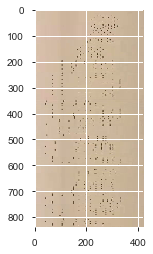

In [22]:
from moviepy.editor import VideoFileClip # for video processing
from pylab import * # for mathematics/plotting

# load the video, clipping between t=2s and t=30s
video = VideoFileClip('./limehouse_nights.mp4').subclip(2,30)

# extract the focus lines (row 156) in frames 58 to 478.
roll_picture = vstack([frame[[156],58:478] for frame in video.iter_frames()])

imshow(roll_picture) # display the obtained picture

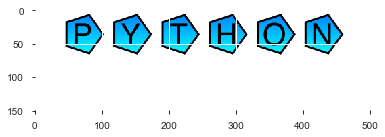

In [23]:
import numpy as np
import gizeh as gz
import moviepy.editor as mpy

def make_text(t, text):
    W = 500  # width
    H = 75  # height
    r = 2 * H / 5
    gradient= gz.ColorGradient("linear",((0,(0,.5,1)),(1,(0,1,1))),
                           xy1=(0,-r), xy2=(0,r))
    polygon = gz.regular_polygon(r, 5, stroke_width=3, fill=gradient)
    surface = gz.Surface(W, H*2, bg_color=(1,1,1))
    for i, letter in enumerate(text):
        angle = max(0,min(1,2*t/2-1.0*i/5))*2*np.pi # rotation angle based on t and i
        txt = gz.text(letter, "Amiri", 3*r/2, fontweight='bold')
        group = (gz.Group([polygon, txt])
                 .rotate(angle)
                 .translate((W*(i+1)/(len(text) + 1), H/2))) # Offset horizontally
        group.draw(surface)
    return surface.get_npimage()

imshow(make_text(0, "PYTHON"))

In [24]:
from IPython.display import display
clip = mpy.VideoClip(lambda t: make_text(t, "PYTHON"), duration=2)
clip.ipython_display(fps=20)

 98%|█████████▊| 40/41 [00:00<00:00, 139.67it/s]


# Resources


## Learning

http://www.oreilly.com/programming/free/a-whirlwind-tour-of-python.csp

http://docs.python-guide.org/en/latest/


## Curated Collections of Packages

https://python.libhunt.com/

https://awesome-python.com/
